<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n250.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,34.620909,78.345773,65.873993,3.444038,228.230579,212.996347,15.234232
1,0.0,1.0,95.837206,23.140728,35.795618,93.238930,-14.320093,243.692390,259.168580,-15.476190
2,0.0,2.0,48.563620,98.267473,42.464114,70.622104,103.440030,373.357340,270.687773,102.669568
3,0.0,3.0,39.954498,50.790642,60.470564,48.858982,-25.572798,184.501888,207.619712,-23.117823
4,0.0,4.0,54.374626,74.092490,76.624742,88.514838,-5.896410,297.710287,294.533537,3.176750
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,67.559994,61.911839,32.504656,93.865133,-2.645965,263.195658,246.547644,16.648015
59996,999.0,56.0,63.436182,54.606862,86.901057,91.406381,-0.260287,306.090195,311.044145,-4.953951
59997,999.0,57.0,86.311548,93.934794,53.282379,27.395438,65.256235,336.180395,266.227255,69.953140
59998,999.0,58.0,78.564703,51.969260,63.338629,27.752724,-5.736626,225.888690,239.770543,-13.881852


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,34.620909,78.345773,65.873993,3.444038,228.230579,212.996347,15.234232
1,0.0,1.0,95.837206,23.140728,35.795618,93.238930,-14.320093,243.692390,259.168580,-15.476190
2,0.0,2.0,48.563620,98.267473,42.464114,70.622104,103.440030,373.357340,270.687773,102.669568
3,0.0,3.0,39.954498,50.790642,60.470564,48.858982,-25.572798,184.501888,207.619712,-23.117823
4,0.0,4.0,54.374626,74.092490,76.624742,88.514838,-5.896410,297.710287,294.533537,3.176750
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,67.559994,61.911839,32.504656,93.865133,-2.645965,263.195658,246.547644,16.648015
59996,999.0,56.0,63.436182,54.606862,86.901057,91.406381,-0.260287,306.090195,311.044145,-4.953951
59997,999.0,57.0,86.311548,93.934794,53.282379,27.395438,65.256235,336.180395,266.227255,69.953140
59998,999.0,58.0,78.564703,51.969260,63.338629,27.752724,-5.736626,225.888690,239.770543,-13.881852


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  34.620909  78.345773  65.873993    3.444038   
      1.0    95.837206  23.140728  35.795618  93.238930  -14.320093   
      2.0    48.563620  98.267473  42.464114  70.622104  103.440030   
      3.0    39.954498  50.790642  60.470564  48.858982  -25.572798   
      4.0    54.374626  74.092490  76.624742  88.514838   -5.896410   
...                ...        ...        ...        ...         ...   
999.0 55.0   67.559994  61.911839  32.504656  93.865133   -2.645965   
      56.0   63.436182  54.606862  86.901057  91.406381   -0.260287   
      57.0   86.311548  93.934794  53.282379  27.395438   65.256235   
      58.0   78.564703  51.969260  63.338629  27.752724   -5.736626   
      59.0   80.878153  61.605977  34.625547  28.730688  -54.734226   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    228.230579  212.996347   15.234232  
      1.0    243.692390  259.168580  -15.476190  
      2.0    373.357340  270.687773  102.669568  
      3.0    184.501888  207.619712  -23.117823  
      4.0    297.710287  294.533537    3.176750  
...                 ...         ...         ...  
999.0 55.0   263.195658  246.547644   16.648015  
      56.0   306.090195  311.044145   -4.953951  
      57.0   336.180395  266.227255   69.953140  
      58.0   225.888690  239.770543  -13.881852  
      59.0   161.106139  210.226184  -49.120045  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  34.620909  78.345773  65.873993    3.444038   
      1.0    95.837206  23.140728  35.795618  93.238930  -14.320093   
      2.0    48.563620  98.267473  42.464114  70.622104  103.440030   
      3.0    39.954498  50.790642  60.470564  48.858982  -25.572798   
      4.0    54.374626  74.092490  76.624742  88.514838   -5.896410   
...                ...        ...        ...        ...         ...   
999.0 55.0   67.559994  61.911839  32.504656  93.865133   -2.645965   
      56.0   63.436182  54.606862  86.901057  91.406381   -0.260287   
      57.0   86.311548  93.934794  53.282379  27.395438   65.256235   
      58.0   78.564703  51.969260  63.338629  27.752724   -5.736626   
      59.0   80.878153  61.605977  34.625547  28.730688  -54.734226   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    228.230579  212.996347   15.234232  
      1.0    243.692390  259.168580  -15.476190  
      2.0    373.357340  270.687773  102.669568  
      3.0    184.501888  207.619712  -23.117823  
      4.0    297.710287  294.533537    3.176750  
...                 ...         ...         ...  
999.0 55.0   263.195658  246.547644   16.648015  
      56.0   306.090195  311.044145   -4.953951  
      57.0   336.180395  266.227255   69.953140  
      58.0   225.888690  239.770543  -13.881852  
      59.0   161.106139  210.226184  -49.120045  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.945866,34.620909,78.345773,65.873993,3.444038,228.230579,212.996347,15.234232
1,0.0,1.0,95.837206,23.140728,35.795618,93.238930,-14.320093,243.692390,259.168580,-15.476190
2,0.0,2.0,48.563620,98.267473,42.464114,70.622104,103.440030,373.357340,270.687773,102.669568
3,0.0,3.0,39.954498,50.790642,60.470564,48.858982,-25.572798,184.501888,207.619712,-23.117823
4,0.0,4.0,54.374626,74.092490,76.624742,88.514838,-5.896410,297.710287,294.533537,3.176750
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,67.559994,61.911839,32.504656,93.865133,-2.645965,263.195658,246.547644,16.648015
59996,999.0,56.0,63.436182,54.606862,86.901057,91.406381,-0.260287,306.090195,311.044145,-4.953951
59997,999.0,57.0,86.311548,93.934794,53.282379,27.395438,65.256235,336.180395,266.227255,69.953140
59998,999.0,58.0,78.564703,51.969260,63.338629,27.752724,-5.736626,225.888690,239.770543,-13.881852


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    35.945866  34.620909  78.345773  65.873993    3.444038   
      1.0    95.837206  23.140728  35.795618  93.238930  -14.320093   
      2.0    48.563620  98.267473  42.464114  70.622104  103.440030   
      3.0    39.954498  50.790642  60.470564  48.858982  -25.572798   
      4.0    54.374626  74.092490  76.624742  88.514838   -5.896410   
...                ...        ...        ...        ...         ...   
999.0 55.0   67.559994  61.911839  32.504656  93.865133   -2.645965   
      56.0   63.436182  54.606862  86.901057  91.406381   -0.260287   
      57.0   86.311548  93.934794  53.282379  27.395438   65.256235   
      58.0   78.564703  51.969260  63.338629  27.752724   -5.736626   
      59.0   80.878153  61.605977  34.625547  28.730688  -54.734226   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    228.230579  212.996347   15.234232  
      1.0    243.692390  259.168580  -15.476190  
      2.0    373.357340  270.687773  102.669568  
      3.0    184.501888  207.619712  -23.117823  
      4.0    297.710287  294.533537    3.176750  
...                 ...         ...         ...  
999.0 55.0   263.195658  246.547644   16.648015  
      56.0   306.090195  311.044145   -4.953951  
      57.0   336.180395  266.227255   69.953140  
      58.0   225.888690  239.770543  -13.881852  
      59.0   161.106139  210.226184  -49.120045  

[60000 rows x 8 columns]

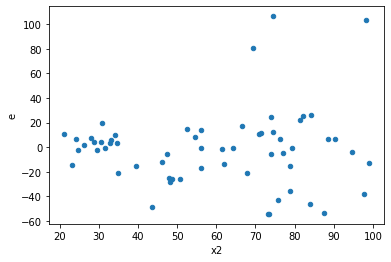

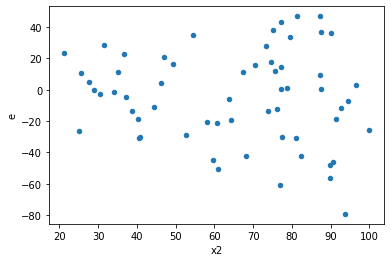

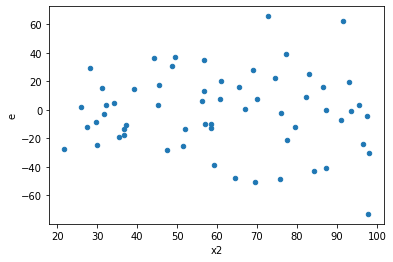

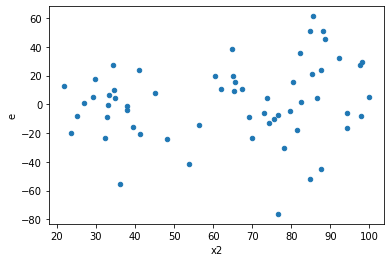

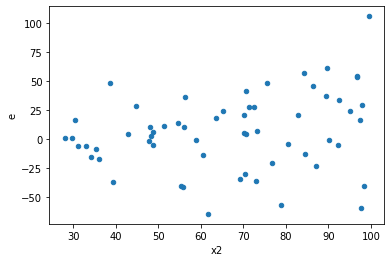

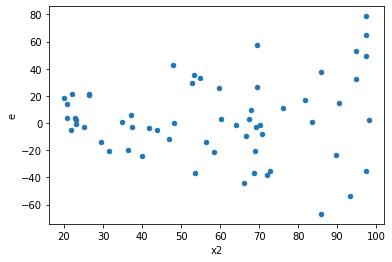

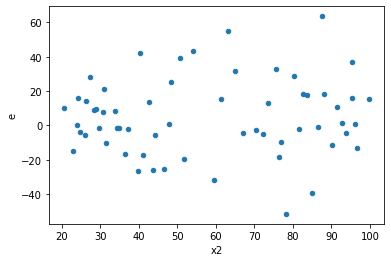

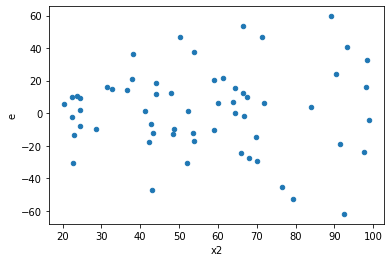

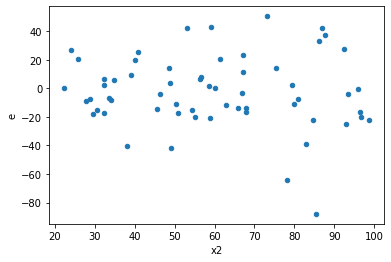

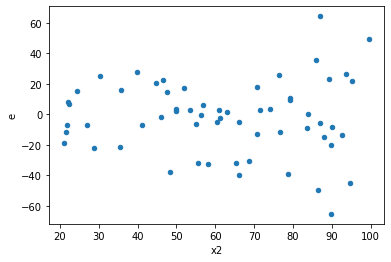

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,13989.38405003176,29587.442692060966,699.469202501588,1479.3721346030484,2.1149925247776578,0.1019184928718595,0.9490407535640702,0.05095924643592975,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,8556.684845385718,26768.94050437264,427.83424226928594,1338.447025218632,3.128424265714083,0.014058234432392513,0.9929708827838037,0.007029117216196257,Reject005=0 : Heteroscedasticity
2.0,20.0,20.0,5695.932870770868,23461.00429563998,284.79664353854344,1173.050214781999,4.11890463387165,0.0026127782686435896,0.9986936108656782,0.0013063891343217948,Reject005=0 : Heteroscedasticity
3.0,20.0,20.0,8130.221977738209,12076.28784701058,406.5110988869104,603.814392350529,1.485357703649089,0.38378759135384133,0.8081062043230793,0.19189379567692066,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,13573.673313631549,32366.531747851423,678.6836656815774,1618.3265873925711,2.3845079367975424,0.058704910710386526,0.9706475446448067,0.029352455355193263,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,14943.378677015684,19136.443342982137,747.1689338507842,956.8221671491068,1.2805968286419576,0.5854190289433692,0.7072904855283154,0.2927095144716846,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,6299.053260274175,15475.527846117246,314.95266301370873,773.7763923058623,2.456802190214161,0.05077336619829431,0.9746133169008528,0.025386683099147156,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,11691.498321600764,17480.529782478246,584.5749160800382,874.0264891239124,1.4951488082739481,0.375990976637109,0.8120045116814455,0.1879954883185545,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,9015.041944342442,11236.32549232228,450.75209721712207,561.816274616114,1.2463974723238915,0.6270303221035292,0.6864848389482354,0.3135151610517646,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,13989.38405003176,29587.442692060966,699.469202501588,1479.3721346030484,2.1149925247776578,0.1019184928718595,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,8556.684845385718,26768.94050437264,427.83424226928594,1338.447025218632,3.128424265714083,0.014058234432392513,Reject005=0 : Heteroscedasticity
2.0,20.0,20.0,5695.932870770868,23461.00429563998,284.79664353854344,1173.050214781999,4.11890463387165,0.0026127782686435896,Reject005=0 : Heteroscedasticity
3.0,20.0,20.0,8130.221977738209,12076.28784701058,406.5110988869104,603.814392350529,1.485357703649089,0.38378759135384133,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,13573.673313631549,32366.531747851423,678.6836656815774,1618.3265873925711,2.3845079367975424,0.058704910710386526,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,14943.378677015684,19136.443342982137,747.1689338507842,956.8221671491068,1.2805968286419576,0.5854190289433692,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,6299.053260274175,15475.527846117246,314.95266301370873,773.7763923058623,2.456802190214161,0.05077336619829431,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,11691.498321600764,17480.529782478246,584.5749160800382,874.0264891239124,1.4951488082739481,0.375990976637109,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,9015.041944342442,11236.32549232228,450.75209721712207,561.816274616114,1.2463974723238915,0.6270303221035292,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      725
Reject005=0 : Heteroscedasticity    275
Name: Result_test, dtype: int64